In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
stud=pd.read_csv(r'C:\Users\femif\Downloads\student.csv')
stud

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [6]:
stud.shape

(145, 16)

In [7]:
stud.size

2320

In [8]:
remove_columns=['Unnamed: 0','Id']
student=student.drop(columns=remove_columns)


In [9]:
student

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [11]:
student.columns

Index(['Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')

In [15]:
student['Sex'].value_counts()

Male      87
Female    58
Name: Sex, dtype: int64

<Axes: >

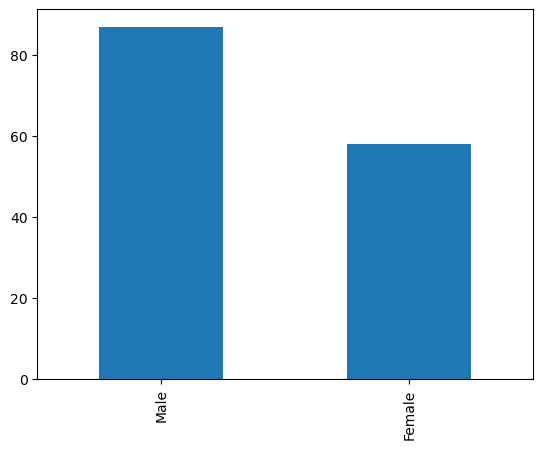

In [16]:
student['Sex'].value_counts().plot(kind='bar')

In [14]:
student['High_School_Type'].value_counts()

State      103
Private     25
Other       17
Name: High_School_Type, dtype: int64

<Axes: >

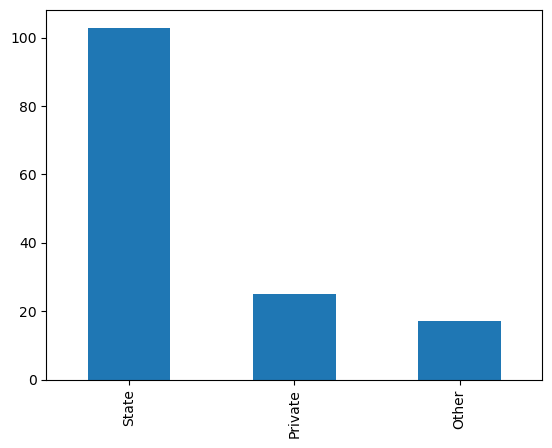

In [17]:
student['High_School_Type'].value_counts().plot(kind='bar')

In [18]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         145 non-null    int64 
 1   Sex                 145 non-null    object
 2   High_School_Type    145 non-null    object
 3   Scholarship         145 non-null    object
 4   Additional_Work     145 non-null    object
 5   Sports_activity     145 non-null    object
 6   Transportation      145 non-null    object
 7   Weekly_Study_Hours  145 non-null    int64 
 8   Attendance          145 non-null    object
 9   Reading             145 non-null    object
 10  Notes               145 non-null    object
 11  Listening_in_Class  145 non-null    object
 12  Project_work        145 non-null    object
 13  Grade               145 non-null    object
dtypes: int64(2), object(12)
memory usage: 16.0+ KB


In [21]:
for column in student.select_dtypes(include='object').columns:
    print(f"{column}, {student[column].unique()}")

Sex, ['Male' 'Female']
High_School_Type, ['Other' 'State' 'Private']
Scholarship, ['50%' '75%' '100%' '25%' 'None']
Additional_Work, ['Yes' 'No']
Sports_activity, ['No' 'Yes']
Transportation, ['Private' 'Bus']
Attendance, ['Always' 'Never' 'Sometimes' '3']
Reading, ['Yes' 'No']
Notes, ['Yes' 'No' '6']
Listening_in_Class, ['No' 'Yes' '6']
Project_work, ['No' 'Yes']
Grade, ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


<Axes: >

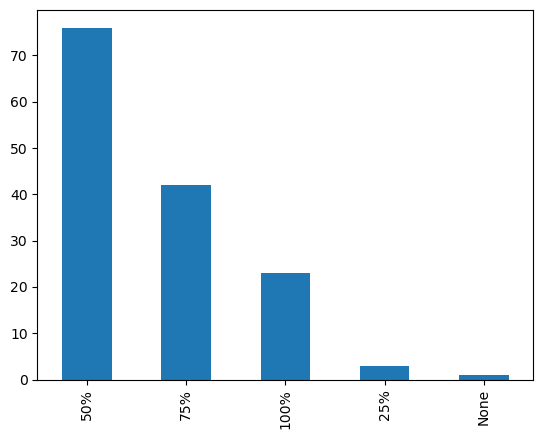

In [23]:
student['Scholarship'].value_counts().plot(kind='bar')

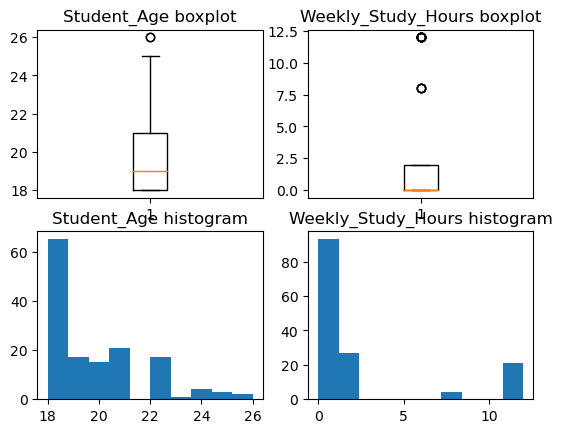

In [24]:
fig, axes = plt.subplots(2,2)
for i, column in enumerate(student.select_dtypes(include='number').columns):
    if i <= 1:
        axes[0][i].boxplot(student[column])
        axes[0][i].set_title(f'{column} boxplot')
        axes[1][i].hist(student[column])
        axes[1][i].set_title(f'{column} histogram')
    

plt.show()


# Adapting our datset needs

treating wrong values

In [27]:
print(student[student['Notes'] ==  '6'].shape) #two rows with wrong values at Notes
print(student[student['Attendance'] == '3'].shape) #one row with wrong value at Attendance
print(student[student['Listening_in_Class'] == '6'].shape) #one row with wrong value at Attendance
print(4/ student.shape[0]) # 2% of wrong values

(2, 14)
(1, 14)
(1, 14)
0.027586206896551724


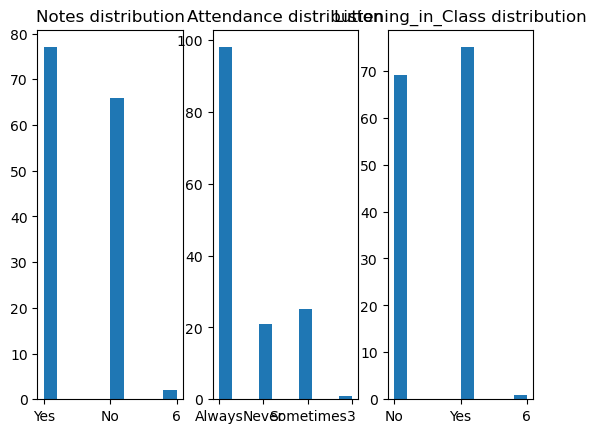

In [32]:
fig, axs = plt.subplots(1,3)
axs[0].hist(student['Notes'])
axs[0].set_title('Notes distribution')

axs[1].hist(student['Attendance'])
axs[1].set_title('Attendance distribution')

axs[2].hist(student['Listening_in_Class'])
axs[2].set_title('Listening_in_Class distribution')

plt.show()

# changing grades and attendence to numerical values

In [34]:
student['Attendance'].value_counts()

Always       98
Sometimes    25
Never        21
3             1
Name: Attendance, dtype: int64

In [39]:
student['Grade'].unique()

array(['AA', 'BA', 'CC', 'Fail', 'BB', 'CB', 'DD', 'DC'], dtype=object)

<Axes: >

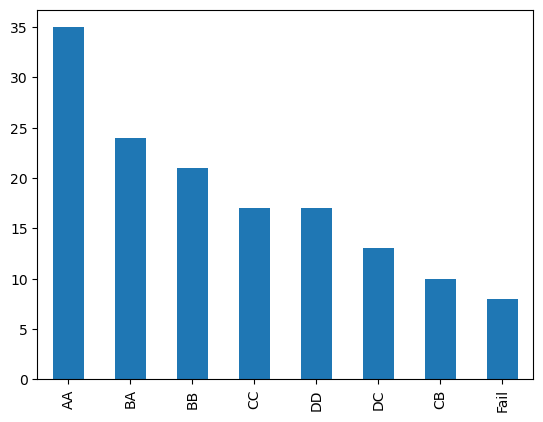

In [35]:
student['Grade'].value_counts().plot(kind='bar')

In [45]:
student.dtypes

Student_Age            int64
Sex                   object
High_School_Type      object
Scholarship           object
Additional_Work       object
Sports_activity       object
Transportation        object
Weekly_Study_Hours     int64
Attendance            object
Reading               object
Notes                 object
Listening_in_Class    object
Project_work          object
Grade                 object
dtype: object

# Heat observing correlation

<Axes: >

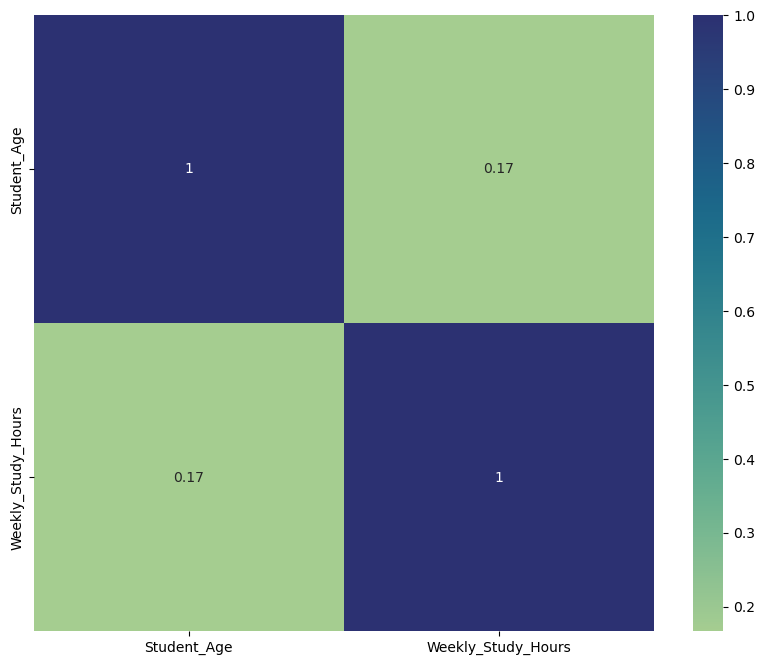

In [48]:
numerical_columns = student.select_dtypes(include='number').columns
corr = student[numerical_columns].corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap="crest")

# Exploring more about Weekly_study_Hours

In [49]:
student['Weekly_Study_Hours'].value_counts()

0     93
2     27
12    21
8      4
Name: Weekly_Study_Hours, dtype: int64

In [52]:
student['High_School_Type'].value_counts()

State      103
Private     25
Other       17
Name: High_School_Type, dtype: int64

In [57]:
sns.boxplot(data=student, x='High_School_Type', y='Grade')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [59]:
student.groupby('High_School_Type')['Grade'].value_counts()

High_School_Type  Grade
Other             AA        6
                  CC        4
                  BA        2
                  DD        2
                  BB        1
                  CB        1
                  DC        1
Private           AA        8
                  BA        5
                  BB        4
                  DD        3
                  CB        2
                  Fail      2
                  DC        1
State             AA       21
                  BA       17
                  BB       16
                  CC       13
                  DD       12
                  DC       11
                  CB        7
                  Fail      6
Name: Grade, dtype: int64

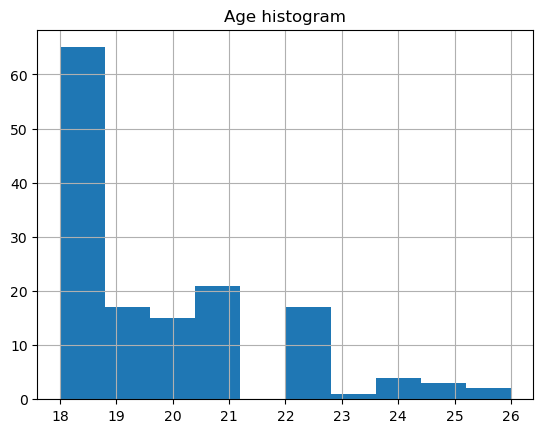

In [69]:
student['Student_Age'].hist()
plt.title('Age histogram')
plt.show()


In [71]:
sns.boxplot(data=student, x='Sex',y='Grade')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.